In [2]:
# 

# Importar librerías, nombres archivo.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
sources = ['emol1', 'emol2','reddit1', 'reddit2','youtube1', 'youtube2','twitter1', 'twitter2','telegram1', 'telegram2']
""" 
lugares v1
Emol 0
Reddit 2
Youtube 4
Twitter 6
Telegram 8
"""

' \nlugares v1\nEmol 0\nReddit 2\nYoutube 4\nTwitter 6\nTelegram 8\n'

### Procesar y exportar la información.

In [8]:
#valor_csv = 0
df_list = []
for valor_csv in range(len(sources)):
    # Se saca el 'content' porque no es necesario y estorba
    df = pd.read_csv("csv/"+sources[valor_csv]+".csv")
    df = df.drop(columns=['content','autocontrol emocional', 'desarrollar y estimular a los demás', 'comunicacion asertiva'])
    # Obtener IQR para determinar outliers
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Agregar datos
    fuente = [sources[valor_csv]] * 17
    n_datos = [len(df)]*20
    df_max = pd.DataFrame(zip(n_datos, fuente, df.columns, (df > (Q3 + 1.5 * IQR)).sum(), (df > (Q3 + 1.5 * IQR)).sum()/df.count(), (Q3+1.5*IQR), df.max()), columns=['n_datos','fuente','factor','outlierCount','outlier%','maxIQR','maximo'])
    df_list.append(df_max)
df_list = pd.concat(df_list)

# Exportar
df_list.to_excel("maximos.xlsx")

### Calculo de errores muestrales

In [7]:
z_score = 1.96 # Z score con un alfa de 0.05, 2 colas
# Si se desea usar una medida no paramétrica
iqr_b = 0
for i in range(len(sources)):
    df_err = pd.read_csv("csv/"+sources[i]+".csv")
    df_err = df_err.drop(columns=['content','autocontrol emocional', 'desarrollar y estimular a los demás', 'comunicacion asertiva'])
    if(iqr_b):
        Q1 = df_err.quantile(0.25)
        Q3 = df_err.quantile(0.75)
        IQR = Q3 - Q1
        std = IQR
    else:
        std = df_err.std()
    sample_error = z_score * std.mean() / math.sqrt(len(df_err))
    print("{0}\t{1}".format(sources[i], sample_error))

emol1	0.045564960194480295
emol2	0.011140414915034768
reddit1	0.06897181729489543
reddit2	0.013341562846706888
youtube1	0.025377442433728466
youtube2	0.007337861746370312
twitter1	0.027595408663113774
twitter2	0.008256573731937078
telegram1	0.017950326651734246
telegram2	0.00501499534453932


##### Pruebas y obtención de gráficos

{'whiskers': [<matplotlib.lines.Line2D at 0x21debc837f0>,
 'caps': [<matplotlib.lines.Line2D at 0x21debc83eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21debc83490>,
 'medians': [<matplotlib.lines.Line2D at 0x21debcf95b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x21debcf9910>,
 'means': []}

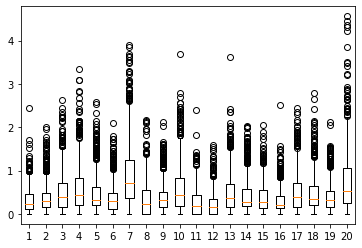

In [11]:
# TEST - Cargar datos y procesarlos - Leer comment de [0]
valor_csv = 4
df = pd.read_csv("csv/"+sources[valor_csv]+".csv")
df = df.drop(columns=['content'])
plt.boxplot(df)